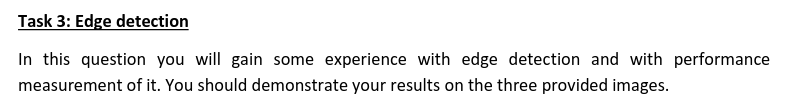

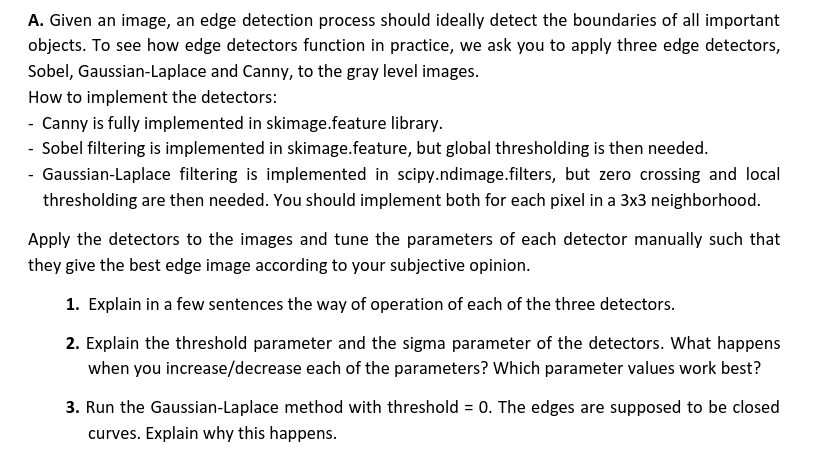

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, feature
from scipy import ndimage
import os
import cv2

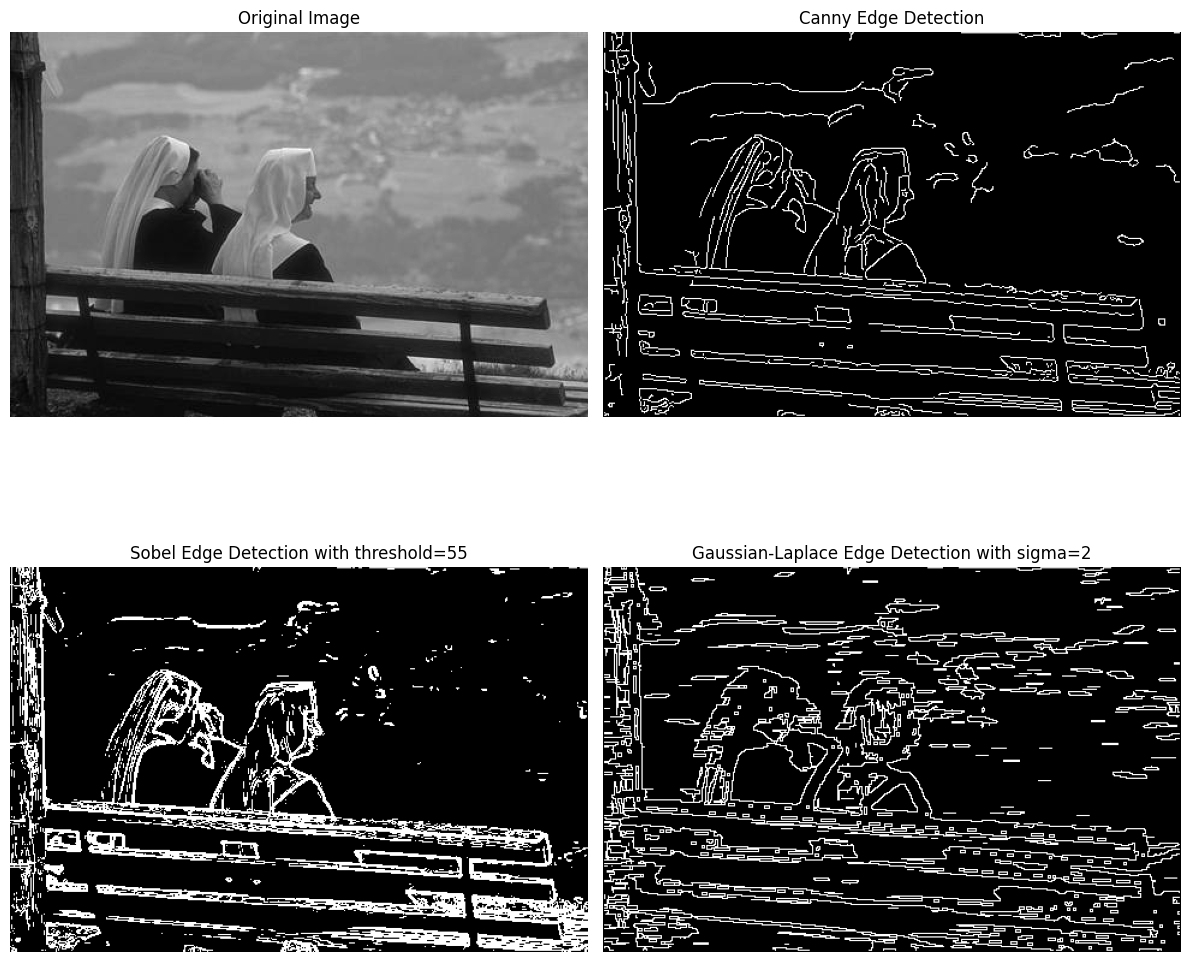

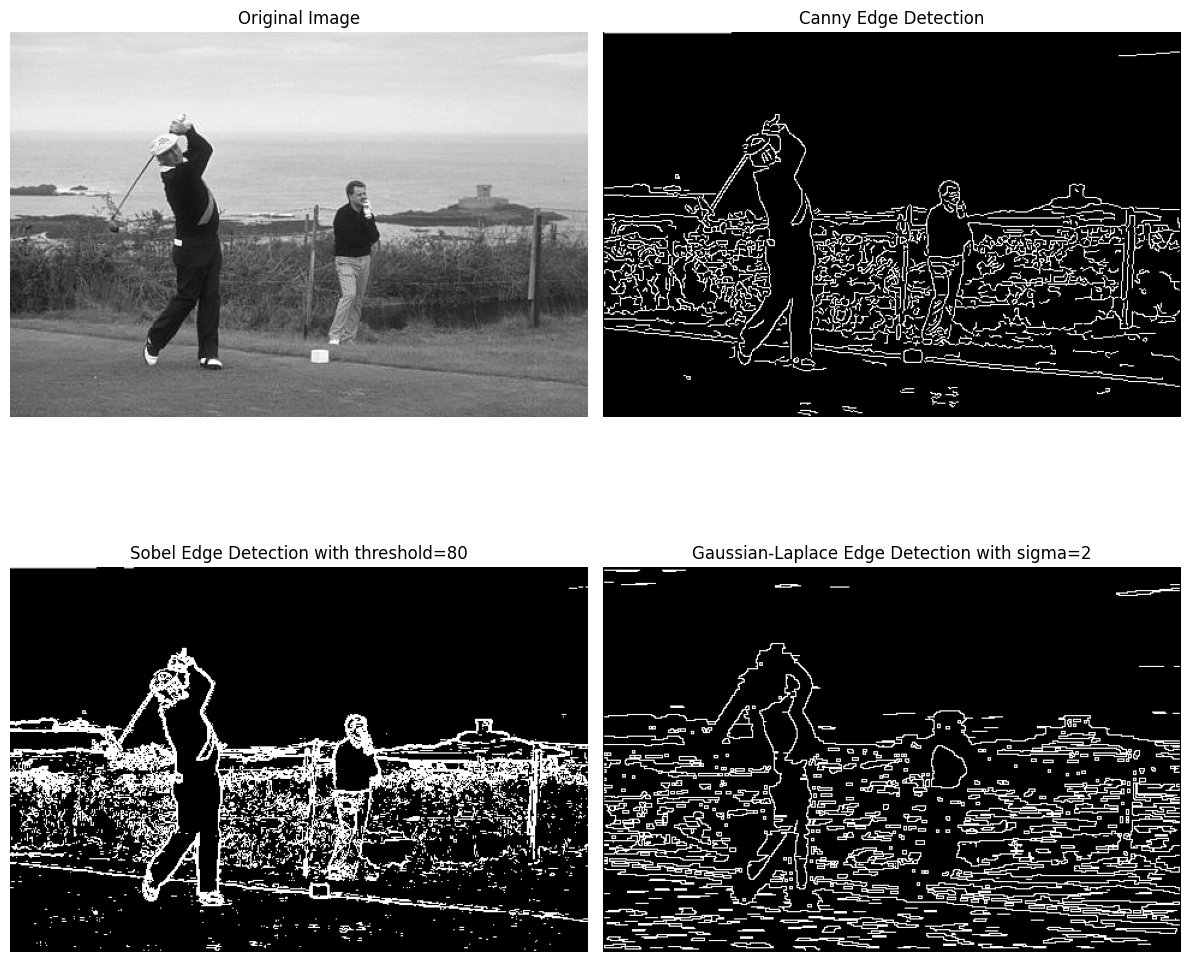

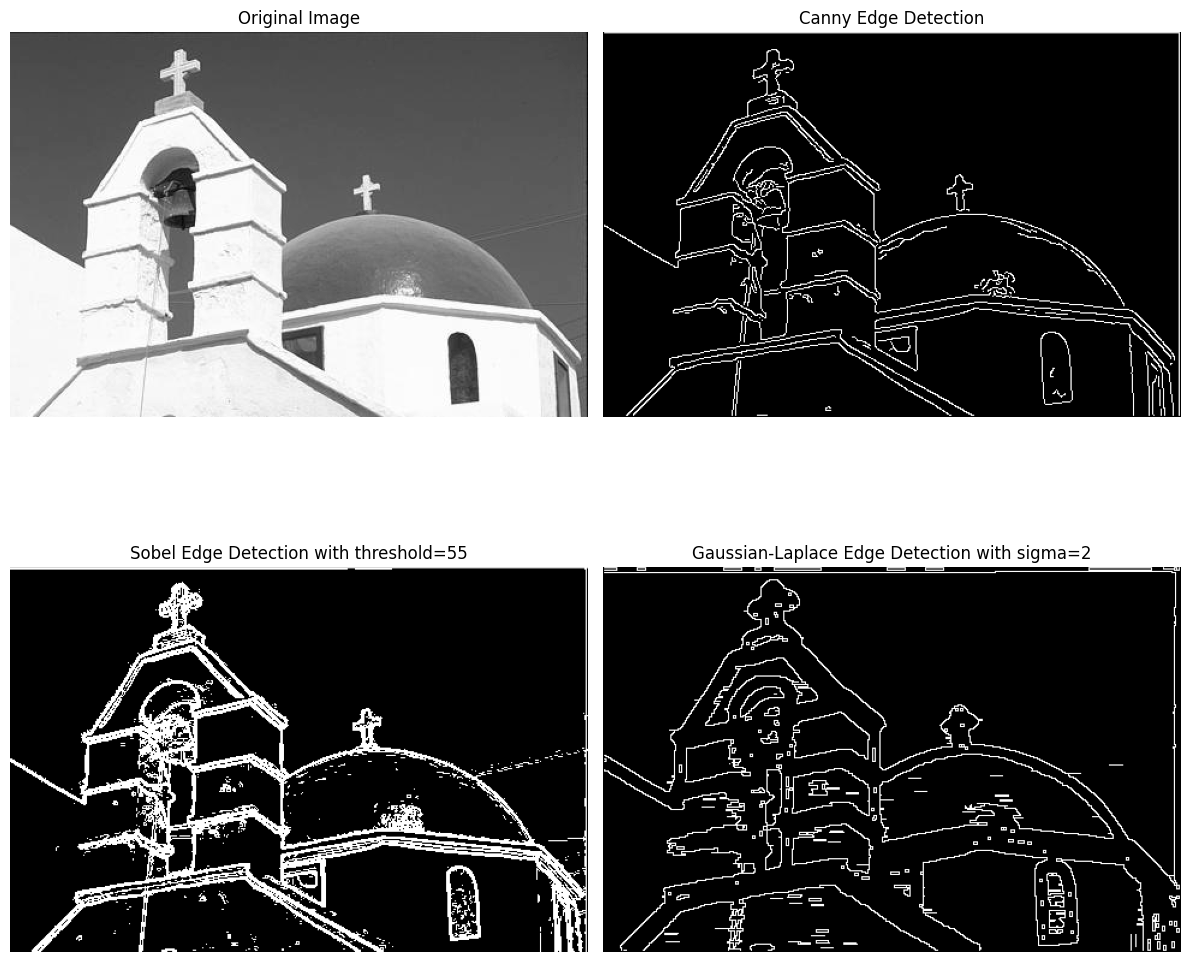

In [2]:
def Canny_Edge_detector(org_img):
    return feature.canny(org_img)


def sobel_edge_detector(image,threshold):
    # Apply Sobel operator
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate gradient magnitude
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Apply a threshold to identify edges
    edges = magnitude > threshold

    return edges

def any_neighbor_zero(img, i, j):
    for k in range(-1,2):
      for l in range(-1,2):
         if img[i+k, j+l] == 0:
            return True
    return False

def zero_crossing(img):
    img[img > 0] = 1
    img[img < 0] = 0
    out_img = np.zeros(img.shape)
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            if img[i,j] > 0 and any_neighbor_zero(img, i, j):
                out_img[i,j] = 255
    return out_img


imges = os.listdir('./Images/Task3')  
thresholds = [55,80,55]
sigmas = [2,2,2]
index = 0;
for img in imges:
    if img.endswith('.jpg'):
        # Display the results
        image= io.imread(f'./Images/Task3/{img}')
        if image.ndim == 3:
            gray_image = color.rgb2gray(image)
        else:
            gray_image = image
        fig, axes = plt.subplots(2, 2, figsize=(12, 12))
        ax = axes.ravel()
        ax[0].imshow(gray_image, cmap='gray')
        ax[0].set_title('Original Image')

        ax[1].imshow(Canny_Edge_detector(gray_image), cmap='gray')
        ax[1].set_title('Canny Edge Detection')

        ax[2].imshow(sobel_edge_detector(image,thresholds[index]), cmap='gray')
        ax[2].set_title(f'Sobel Edge Detection with threshold={thresholds[index]}')

        result= ndimage.gaussian_laplace(gray_image,sigmas[index])
        zeroCross = zero_crossing(result)
        ax[3].imshow(zeroCross, cmap='gray')
        ax[3].set_title(f'Gaussian-Laplace Edge Detection with sigma={sigmas[index]}')
    

        for a in ax:
            a.axis('off')

        plt.tight_layout()
        plt.show()
        index +=1
